# PHASE 4 PROJECT:
# DEVELOPMENT AND EVALUATION OF A MACHINE LEARNING-BASED DJIA PREDICTION SYSTEM.

| Collaborators        | 
| -------------------- |
| Ian Vaati            |
| Sylvia Murithi       |
| Bushra Mohammed      |

**Project Submission Date:** December 11th, 2023.


# BUSINESS UNDERSTANDING.

## Executive Summary

The stock market is a complex and dynamic system that plays a crucial role in the global economy. Predicting stock market movements can provide valuable insights for investors and financial institutions, enabling them to make informed decisions about investment strategies and risk management. This project aims to develop a machine learning model capable of predicting the short-term movement of the Dow Jones Industrial Average (DJIA), a prominent stock market index, using historical data.

## Business Problem

Accurately forecasting stock market movements is a challenging task due to the inherent volatility and unpredictability of financial markets. Existing forecasting methods often rely on simple technical indicators or subjective analysis, which may not capture the full complexity of market dynamics. A more sophisticated approach is needed to provide accurate and consistent predictions that can inform investment decisions.

## Business Objectives

* **Forecasting Accuracy:** Develop accurate and reliable models to predict future trends in the Dow Jones Industrial Average, allowing stakeholders to anticipate market movements with greater precision.

* **Risk Mitigation:** Provide insights into potential market risks and opportunities, enabling proactive risk management strategies for investors and financial institutions.

* **Decision Support:** Equip decision-makers with actionable information derived from predictive models, empowering them to make informed investment decisions and optimize portfolio management.

* **Market Intelligence:** Enhance market intelligence by identifying patterns, trends, and key indicators that contribute to a deeper understanding of market dynamics.

### Business Benefits

Accurate stock market predictions can provide several benefits to investors and financial institutions:

* **Improved Investment Decisions:** By understanding the direction of market movements, investors can make more informed decisions about buying, selling, or holding stocks.


* **Risk Management:** Accurate predictions can help investors identify potential risks and take appropriate measures to mitigate them.

* **Enhanced Financial Planning:** Financial institutions can use stock market predictions to develop more effective investment strategies and risk management plans.

### Business Stakeholders
The target stakeholders for this project includes:

* **Individual Investors:** Individuals seeking to make informed investment decisions based on market predictions.

* **Financial Institutions:** Banks and financial organizations aiming to enhance their risk management strategies.

* **Financial Analysts:** Analysts who need to forecast market movements for research and reporting purposes.

* **Portfolio Managers:** Individuals responsible for managing investment portfolios, seeking tools to optimize performance.

## Key Deliverables
The project will focus on the following:
* **Predictive Models:** Develop and deploy machine learning models capable of forecasting future values of the Dow Jones Industrial Average.

* **Visualizations and Reports:** Provide visually appealing and informative representations of market trends, predictions, and relevant indicators to aid decision-makers.

* **Documentation:** Create comprehensive documentation detailing the project's methodologies, data sources, model selection, and performance evaluation.

* **Training and Support:** Offer training sessions and ongoing support to stakeholders on interpreting and utilizing the predictive models effectively.

## Success Criteria
The project will be considered successful if the following criteria are met:

* The developed machine learning model accurately predicts the direction of DJIA movement (up, down, or sideways) for the specified time horizon.

* The web application or API provides a user-friendly interface for obtaining DJIA predictions.

By achieving these success criteria, the project will demonstrate the potential of machine learning to provide valuable insights into stock market movements, empowering investors and financial institutions to make informed decisions.

# Methodology

## Research Questions

1. Can historical data from Dow Joes Industrial Average (DJIA) be used to predict future market trends accurately?

2. What key features or indicators contribte significantly to predicting stock market movements?

3. Which machine learning algorithms are best suited for predicting DJIA movement?

## Hypothesis

1. Historical trends and patterns in Dow Jones Industrial Average data can be leveraged to forecast future market trends with reasonable accuracy.

2. Technical indicators like moving averages, relative strength index (RSI), and MACD will be crucial features for predicting stock market trends.

3. Time series forecasting models like ARIMA, LSTM, and Prophet will outperform basic regression models in predicting stock market movements.

## Research Design
* **Analytical Approach:** Utilize an analytical approach by applying various machine learning models to historical Dow Jones Industrial Average data to forecast future trends.

* **Time Series Analysis:** Focus on time series analysis methodologies to capture the sequential nature of stock market data.

## Data Description
### Data Source:
The data for this project was collected from the [investing.com website](https://www.investing.com/indices/us-30-historical-data)
, which provides historical data for various financial indices, including the Dow Jones Industrial Average (DJIA). The data covers a period from 01/03/2000 to 11/24/2023 and includes the following attributes:

### Data Variables:
1. **Date:** Represents the date for which the data is recorded.

2. **Close:** Represents the closing price of the DJIA for the specified date.

3. **Open:** Represents the opening price of the DJIA for the specified date.

4. **High:** Represents the highest price reached by the DJIA during the specified day.

5. **Low:** Represents the lowest price reached by the DJIA during the specified day.

6. **Volume:** Represents the total trading volume of the DJIA for the specified day.

7. **Change %:** Represents the difference between a specified day's closing price and the previous day's closing price expressed as a percentage. The (+/-) sign indicate the change in value

# Data Analysis

### Load the Data

In [1]:
# Import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans  
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input
from sklearn.metrics import mean_squared_error 
from prophet import Prophet

In [2]:
# Load and display the dataset
df = pd.read_csv('Dow Jones Industrial Average Historical Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,11/24/2023,"35,390.57","35,299.90","35,399.04","35,299.90",97.67M,0.33%
1,11/22/2023,"35,272.77","35,189.33","35,315.12","35,155.80",232.92M,0.53%
2,11/21/2023,"35,088.29","35,113.50","35,117.26","35,038.99",263.11M,-0.18%
3,11/20/2023,"35,150.97","34,928.27","35,226.82","34,907.98",320.68M,0.58%
4,11/17/2023,"34,947.28","35,018.83","35,028.22","34,883.03",323.66M,0.00%
...,...,...,...,...,...,...,...
6008,01/07/2000,"11,522.56","11,247.06","11,528.14","11,239.92",184.90M,2.39%
6009,01/06/2000,"11,253.27","11,113.37","11,313.45","11,098.45",176.55M,1.17%
6010,01/05/2000,"11,122.66","10,989.37","11,215.10","10,938.67",203.19M,1.13%
6011,01/04/2000,"10,997.94","11,349.75","11,350.06","10,986.45",178.42M,-3.17%


In [3]:
# Creating a copy of the DataFrame 
df = df.copy() 

# Displaying the first few rows of the copied DataFrame 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/24/2023,"35,390.57","35,299.90","35,399.04","35,299.90",97.67M,0.33%
1,11/22/2023,"35,272.77","35,189.33","35,315.12","35,155.80",232.92M,0.53%
2,11/21/2023,"35,088.29","35,113.50","35,117.26","35,038.99",263.11M,-0.18%
3,11/20/2023,"35,150.97","34,928.27","35,226.82","34,907.98",320.68M,0.58%
4,11/17/2023,"34,947.28","35,018.83","35,028.22","34,883.03",323.66M,0.00%


### Data Exploration

### Inspect the Data

In [4]:
# check the data types  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6013 non-null   object
 1   Price     6013 non-null   object
 2   Open      6013 non-null   object
 3   High      6013 non-null   object
 4   Low       6013 non-null   object
 5   Vol.      6013 non-null   object
 6   Change %  6013 non-null   object
dtypes: object(7)
memory usage: 329.0+ KB


In [5]:
# convert the data types to the desired datatypes
# 1. Convert the date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# 2. convert the Price, Open, High, Low Columns to float format
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

# 3. Convert the Vol. column to Float format after converting 'M' (millions) to numeric values.
# Remove 'M' and convert to numeric
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1_000_000  # Multiply by 1 million
# Convert to integer (if no fractional values) or float
df['Vol.'] = df['Vol.'].astype(float)  

#4. Convert the % column to float formart after removing the percentage symbol
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

In [6]:
# Check for missing values
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [7]:
# summary statistics
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,6013,6013.000000,6013.000000,6013.000000,6013.000000,6.013000e+03,6013.000000
mean,2011-12-15 17:19:06.515882240,16951.700030,16949.014570,17049.201510,16844.343152,2.421320e+08,0.025621
min,2000-01-03 00:00:00,6547.050000,6547.010000,6709.610000,6469.950000,3.364000e+07,-12.930000
25%,2005-12-23 00:00:00,10565.390000,10565.270000,10619.770000,10503.760000,1.612300e+08,-0.470000
50%,2011-12-13 00:00:00,13074.040000,13067.180000,13140.580000,13002.770000,2.331500e+08,0.050000
75%,2017-12-04 00:00:00,23323.660000,23224.120000,23406.350000,23067.640000,3.042100e+08,0.560000
max,2023-11-24 00:00:00,36799.650000,36722.600000,36952.650000,36636.000000,9.226800e+08,11.370000
std,NaN,8245.524402,8245.084245,8282.989166,8204.295635,1.136963e+08,1.178550


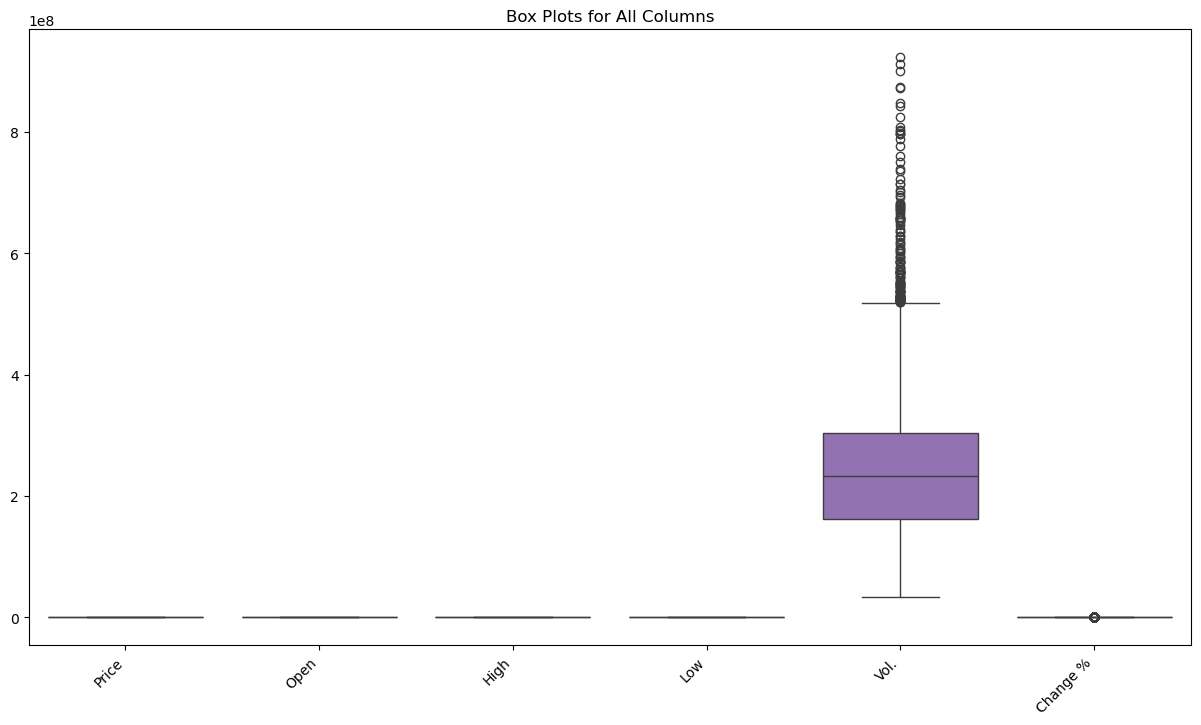

In [8]:
# checking for outliers
# Visualize box plots for all columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Box Plots for All Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
# Identify and display potential outliers using Tukey's method
def identify_outliers_tukey(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Create a DataFrame to store outliers
outliers_df = pd.DataFrame()

# Identify outliers for each column
for column in df.columns:
    outliers_df[column] = identify_outliers_tukey(df[column])

# Display rows with outliers
outliers_rows = df[outliers_df.any(axis=1)]
outliers_rows

,Date,Price,Open,High,Low,Vol.,Change %
111,2023-06-16,34299.12,34464.02,34588.68,34285.69,609150000.0,-0.32
121,2023-06-02,33762.76,33187.58,33805.00,33187.58,389260000.0,2.12
123,2023-05-31,32908.27,32948.71,32984.83,32739.73,695130000.0,-0.41
174,2023-03-17,31861.98,32217.32,32217.32,31728.70,722090000.0,-1.19
192,2023-02-21,33129.59,33699.69,33699.69,33115.74,348320000.0,-2.06
...,...,...,...,...,...,...,...
5986,2000-02-09,10699.17,10948.82,10948.82,10698.85,168550000.0,-2.36
5994,2000-01-28,10738.88,11024.92,11024.92,10735.77,183060000.0,-2.62
5998,2000-01-24,11008.17,11251.94,11366.50,10917.27,202740000.0,-2.16
6008,2000-01-07,11522.56,11247.06,11528.14,11239.92,184900000.0,2.39


The outliers in the dataset are left as they are since it may carry valuable information. Extreme stock price movements can be driven by significant events, news, or market conditions. Removing outliers might result in the loss of important information.

### Visualize Time Series Data

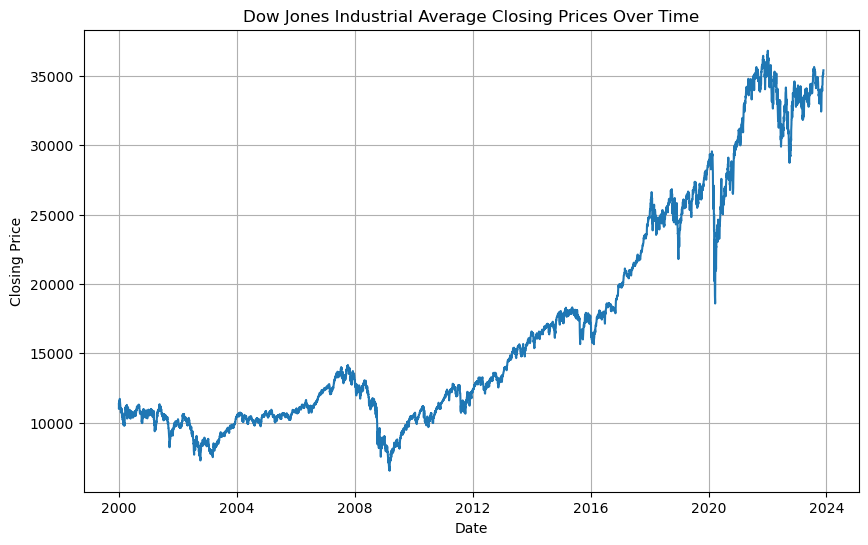

In [10]:
# Plotting the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Dow Jones Industrial Average Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

### Explore the Distributions and Trends

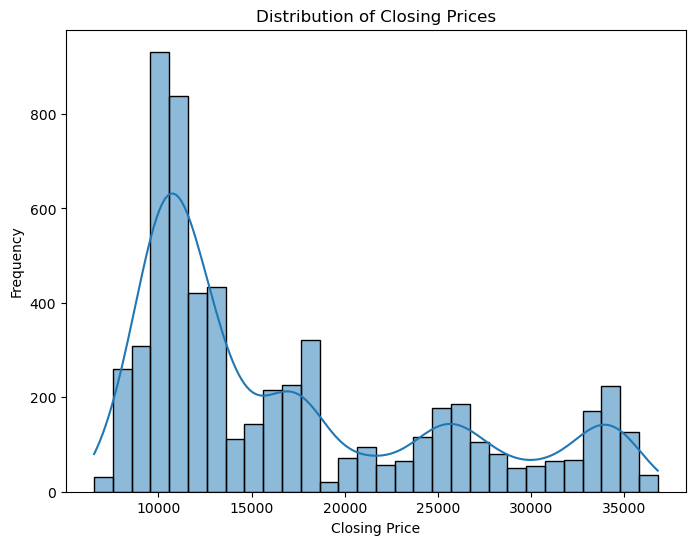

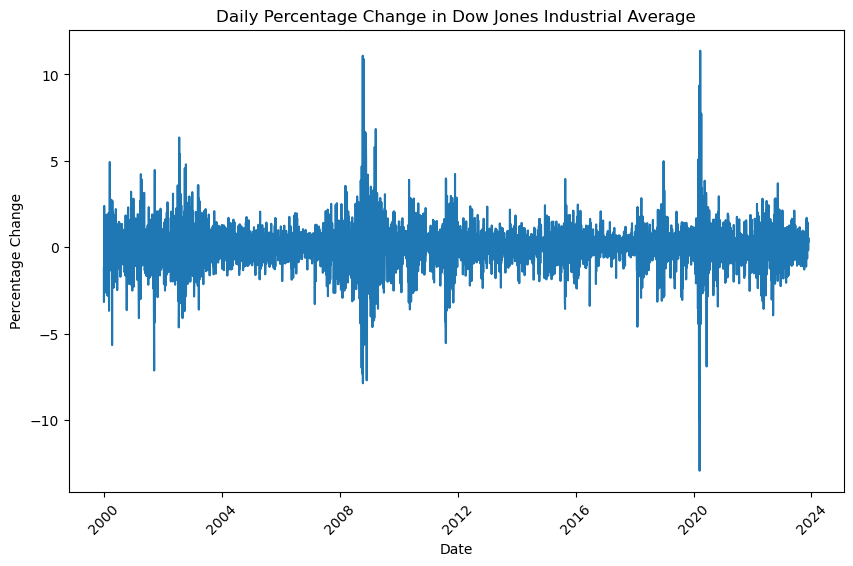

In [11]:
# Distribution of Closing Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Trends in Daily Percentage Change
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Date'], y=df['Change %'])
plt.title('Daily Percentage Change in Dow Jones Industrial Average')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.show()


### Correlation Analysis
This analysis aids in understanding relationships, identifying multicollinearity, and guiding feature selection for machine learning models. The heatmap provides a visually intuitive representation, facilitating quick interpretation and communication of complex relationships among financial features.

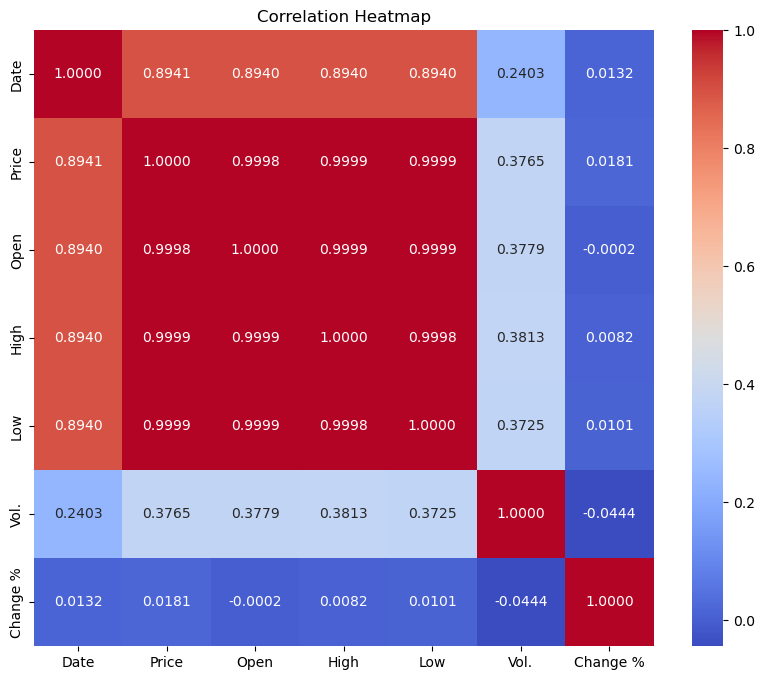

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Heatmap')
plt.show()


The correlation matrix reveals strong positive linear relationships among the stock market variables. The closing price (Price) exhibits near-perfect correlations with the opening price (Open), highest price during the day (High), and lowest price during the day (Low). The opening, high, and low prices are also highly correlated with each other. In contrast, volume (Vol.) shows moderate positive correlations with the price-related variables, suggesting some level of association between trading volume and stock prices. The percentage change (Change %) exhibits weak correlations with the price-related variables, indicating a limited linear relationship. 

# Feature Understanding.

## Time-Based Feature Creation and Technical Indicators

Additional time-based features are created, such as day of the week, month, and year. The moving averages (MA_10, MA_50 and MA_200) and daily returns are calculated.
Rows with missing values introduced by rolling means are dropped.


In [13]:
# Create additional time-based features
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Calculate moving averages
df['MA_10'] = df['Price'].rolling(window=10).mean()
df['MA_50'] = df['Price'].rolling(window=50).mean()
df['MA_200'] = df['Price'].rolling(window=200).mean()

# Calculate daily returns
df['daily_return'] = df['Price'].pct_change()

# Drop rows with missing values introduced by rolling means
df.dropna(inplace=True)

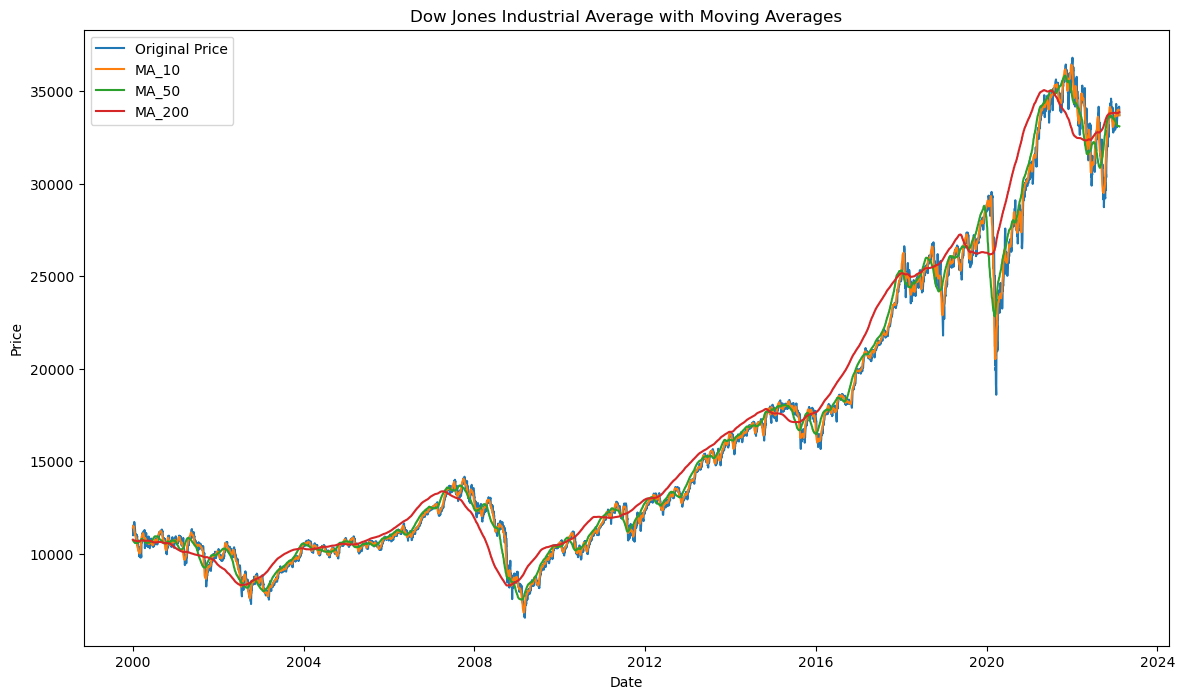

In [14]:
# Plotting the original price and moving averages
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df['MA_10'], label='MA_10')
plt.plot(df['Date'], df['MA_50'], label='MA_50')
plt.plot(df['Date'], df['MA_200'], label='MA_200')

plt.title('Dow Jones Industrial Average with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

From the graph we can see that the best values to measure the moving average is the 10 days and the 50 days because we still capture trends in the data.

## Relative Strength Index
The Relative Strength Index (RSI) is a tool in finance that helps traders understand if a market has moved too much in one direction. It shows if prices have gone up a lot (overbought) or gone down a lot (oversold). 

When RSI is high, it might mean prices are too high,suggesting a possible drop. On the other hand, if RSI is low, it might suggest prices are too low, it indicates a possible increase. 

RSI gives a number between 0 and 100, with over 70 indicating overbought and under 30 indicating oversold. Traders use RSI to find potential points where prices could change direction. It's a helpful tool to understand market conditions and make smarter trading choices.

In [15]:
# Calculate daily price changes
delta = df['Price'].diff()

# Identify gains (positive changes) and set losses to 0
gain = delta.where(delta > 0, 0)

# Identify losses (negative changes) and set gains to 0
loss = -delta.where(delta < 0, 0)

# Calculate the average gain over a 14-day window
avg_gain = gain.rolling(window=14).mean()

# Calculate the average loss over a 14-day window
avg_loss = loss.rolling(window=14).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Calculate the Relative Strength Index (RSI)
df['RSI'] = 100 - (100 / (1 + rs))

# Create lag features
df['Price_Lag_1'] = df['Price'].shift(1)
df['Price_Lag_5'] = df['Price'].shift(5)

# Drop rows with NaN values resulting from lag features
df = df.dropna()

# View the data
df

,Date,Price,Open,High,Low,Vol.,Change %,day_of_week,month,year,MA_10,MA_50,MA_200,daily_return,RSI,Price_Lag_1,Price_Lag_5
212,2023-01-23,33629.56,33439.56,33782.88,33316.25,357540000.0,0.76,0,1,2023,33891.089,33137.5200,33808.15515,-0.003095,48.158970,33733.96,33717.09
213,2023-01-20,33375.49,33073.46,33381.95,32948.93,369420000.0,1.00,4,1,2023,33836.037,33133.0068,33804.55330,-0.007555,42.504402,33629.56,33978.08
214,2023-01-19,33044.56,33171.35,33227.49,32982.05,321330000.0,-0.76,3,1,2023,33735.099,33128.4150,33799.46950,-0.009915,29.862357,33375.49,33949.41
215,2023-01-18,33296.96,33948.49,34016.53,33269.90,354570000.0,-1.81,2,1,2023,33655.499,33137.1736,33796.75875,0.007638,31.231799,33044.56,33743.84
216,2023-01-17,33910.85,34222.32,34269.97,33860.67,355390000.0,-1.14,1,1,2023,33637.980,33161.0386,33799.94010,0.018437,50.375766,33296.96,33733.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2000-01-07,11522.56,11247.06,11528.14,11239.92,184900000.0,2.39,4,1,2000,11511.550,10679.2266,10741.32905,-0.004290,78.888660,11572.20,11722.98
6009,2000-01-06,11253.27,11113.37,11313.45,11098.45,176550000.0,1.17,3,1,2000,11511.705,10690.6870,10746.46245,-0.023371,58.426361,11522.56,11582.44
6010,2000-01-05,11122.66,10989.37,11215.10,10938.67,203190000.0,1.13,2,1,2000,11488.841,10701.2354,10751.36085,-0.011606,53.066333,11253.27,11551.11
6011,2000-01-04,10997.94,11349.75,11350.06,10986.45,178420000.0,-3.17,1,1,2000,11439.698,10708.5820,10756.47545,-0.011213,48.991344,11122.66,11511.09


## The Autoregressive Integrated Moving Average (ARIMA)

In essence, ARIMA is designed to capture and model the temporal dependencies, trends, and fluctuations present in time series data. 
The Autoregressive Integrated Moving Average (ARIMA) model is a powerful time series forecasting method that combines autoregression (AR), differencing (I), and moving average (MA) components. The model is denoted as ARIMA(p, d, q), where p represents the lag order or the number of lag observations included in the model, d is the degree of differencing indicating how many times the raw observations undergo differencing to achieve stationarity, and q is the order of the moving average, which signifies the size of the moving average window.

In essence, ARIMA is designed to capture and model the temporal dependencies, trends, and fluctuations present in time series data. 

## Stationarity of the dataset
Checking for stationarity is important because it ensures that the statistical properties of the time series, such as mean and variance, remain constant over time, providing a stable foundation for modeling and forecasting.

Hypothesis:

Null Hypothesis (H0): Presence of a unit root thus exhibits a trend or seasonality

Alternative Hypothesis (H1): The time series data is stationary.

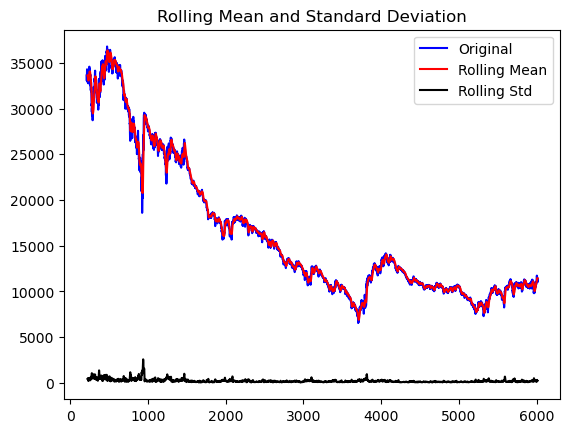

Results of dickey fuller test
Test Statistics                  -2.351880
p-value                           0.155781
No. of lags used                 32.000000
Number of observations used    5768.000000
critical value (1%)              -3.431484
critical value (5%)              -2.862041
critical value (10%)             -2.567037
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df['Price'])

From the result, the Augmented Dickey-Fuller (ADF) test statistic is -2.351880, and the corresponding p-value is 0.155781.
In this case, the p-value is greater than 0.05, we, therefore, fail to reject the null hypothesis, this suggests that there is evidence that the series has a unit root and exhibits a trend or seasonality.

Since the data is non-stationary, we will apply transformations to make it stationary.
Common techniques include differencing or taking the logarithm. We will use the differencing method and drop the null values

In [17]:
# Compute the first-order difference
df['Price_diff'] = df['Price'].diff().dropna()

In [18]:
def adf_test(timeseries):
    print("Differenced Series:")
    print(timeseries.head())
    
    result = adfuller(timeseries.dropna(), autolag='AIC')  # Drop NaN values before the test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print('Reject the null hypothesis and conclude that the time series is likely stationary.')
    else:
        print('Fail to reject the null hypothesis and conclude that the time series is likely non-stationary.')
# ADF test on differenced data
adf_test(df['Price_diff'])

Differenced Series:
212       NaN
213   -254.07
214   -330.93
215    252.40
216    613.89
Name: Price_diff, dtype: float64
ADF Statistic: -15.581218072796037
p-value: 1.931544193081318e-28
Critical Values: {'1%': -3.4314842254822664, '5%': -2.8620412197041305, '10%': -2.567036797329616}
Reject the null hypothesis and conclude that the time series is likely stationary.


From the result, the p-value is below the 0.05 significance level. This provides strong evidence against the null hypothesis.
We therefore conclude that the first difference time series is stationary

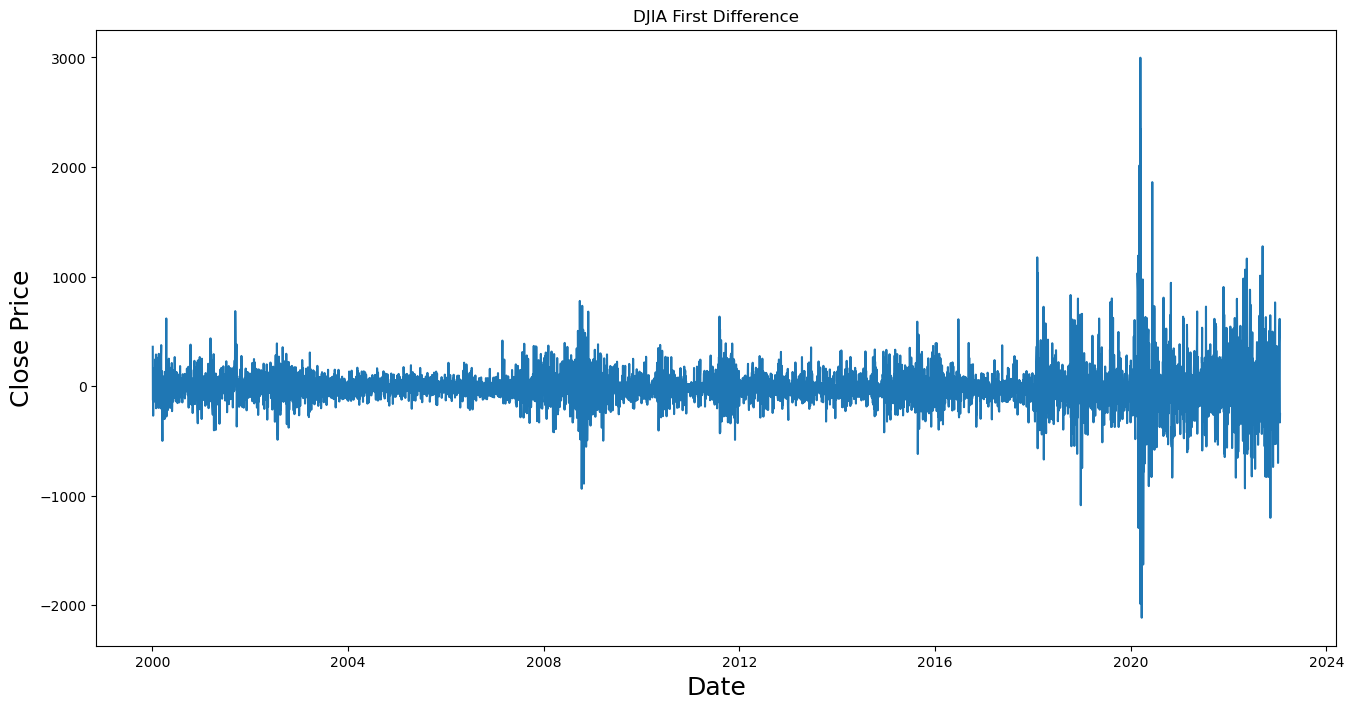

In [19]:
# Visualize the differenced data
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Price_diff'])
plt.title("DJIA First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [20]:
# Check for seasonality on the differenced price using the Kruskal-Wallis test
from scipy.stats import kruskal
import numpy as np

def seasonality_test(series):
    seasonal = False
    idx = np.arange(len(series.index)) % 12
    H_statistic, p_value = kruskal(series, idx)
    if p_value <= 0.05:
        seasonal = True
    return seasonal

# 'Price_diff' is the column of interest

series = df['Price_diff']

# Call the seasonality_test function
is_seasonal = seasonality_test(series)

# Print the result
print(f"Is the time series seasonal? {is_seasonal}")

Is the time series seasonal? False


The result from the seasonality test is "False," this suggests that, based on the Kruskal-Wallis test for seasonality, there is no significant evidence to support the presence of seasonality in the time series.

# Modelling.

### Splitting the data into train-test

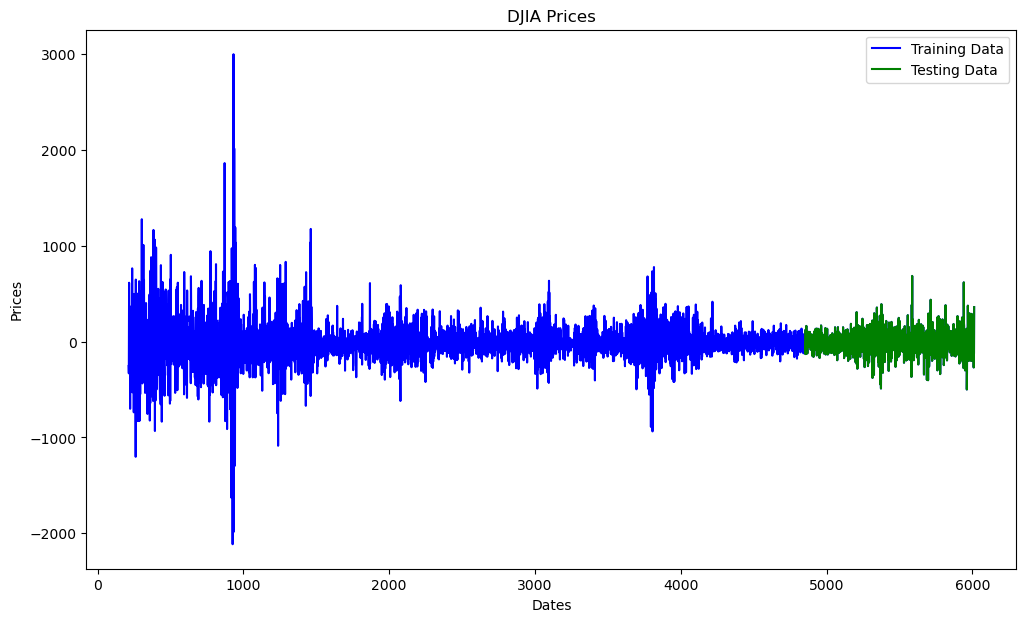

In [21]:
# Split the data into train & test data
# Train-test split, 80% of the data is used for training and the remaining 20% is used for testing 
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

# Visualize the data
plt.figure(figsize=(12,7))
plt.title('DJIA Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Price_diff'], 'blue', label='Training Data')
plt.plot(test_data['Price_diff'], 'green', label='Testing Data')
plt.legend()
plt.show()

## ARIMA MODEL
The auto_arima function from the pmdarima library is used to automatically determine the optimal parameters (p, d, q) for the ARIMA model.

In [22]:
from pmdarima import auto_arima

# Fill the missing value in the differenced data with median
train_data['Price_diff'].fillna(train_data['Price_diff'].mean(), inplace=True)

# Use auto_arima to find the best ARIMA model
model_autoARIMA = auto_arima(df['Price_diff'], suppress_warnings=True, seasonal=False, stepwise=True)
model_autoARIMA

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

From the results obtained from Auto Arima, it is clear that best model is determined to be ARIMA(2,0,2). This means that : p (Order of Autoregression(AR)): 2, d (Order of Differencing): 0, q (Order of Moving Average(MA)): 2

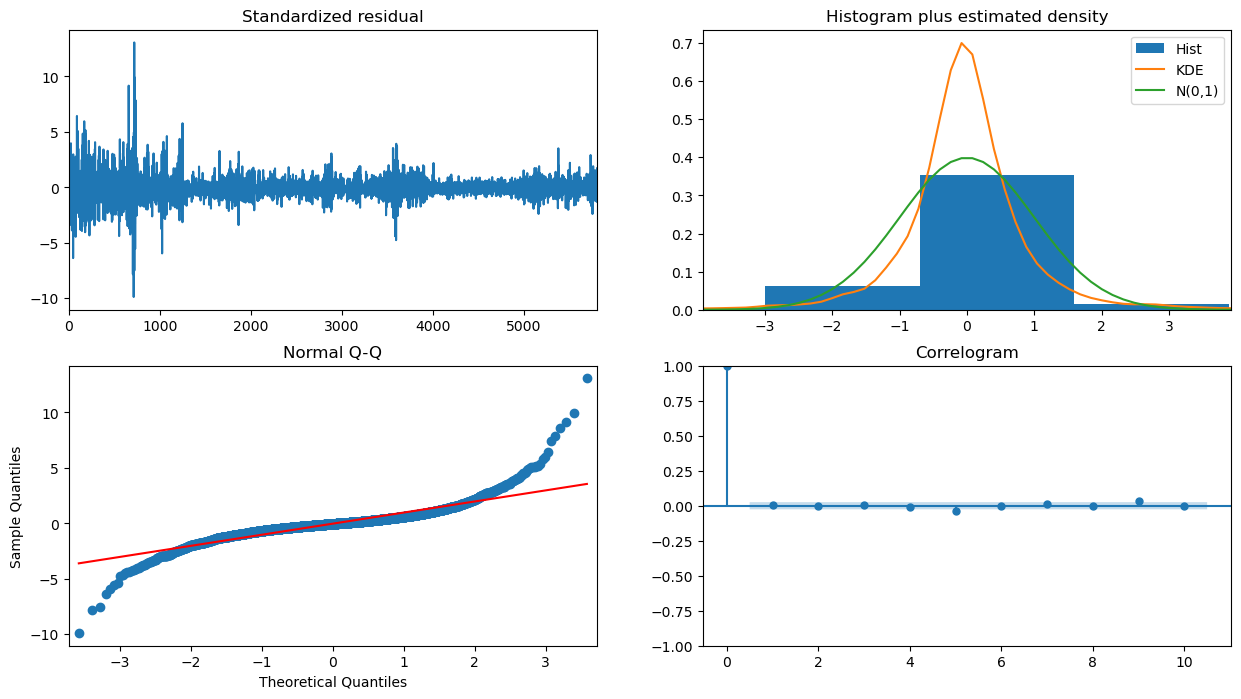

In [23]:
# Print model diagnostics
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [24]:
print("""Based on the plots:
Top left : The residual errors appear fluctuate around the mean of zero.

Top Right : The density plot on the top right indicates a normal distribution with a mean of zero.

Bottom Left : The data is normally distributed

Bottom Right : Based on the Correlogram (ACF plot), the residual errors are not autocorrelated.""")

Based on the plots:
Top left : The residual errors appear fluctuate around the mean of zero.

Top Right : The density plot on the top right indicates a normal distribution with a mean of zero.

Bottom Left : The data is normally distributed

Bottom Right : Based on the Correlogram (ACF plot), the residual errors are not autocorrelated.


In [25]:
# Suppress ARIMA warnings
warnings.filterwarnings("ignore")

# Build ARIMA Model on differenced data, the order(2,0,2) gotten from the auto_arima
model = ARIMA(train_data['Price_diff'], order=(2,0,2))  
fitted_model = model.fit()

# Print summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                 4640
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -31468.345
Date:                Sun, 17 Dec 2023   AIC                          62948.690
Time:                        11:07:09   BIC                          62987.345
Sample:                             0   HQIC                         62962.289
                               - 4640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0777      3.066     -1.656      0.098     -11.088       0.932
ar.L1         -1.7281      0.011   -156.612      0.000      -1.750      -1.706
ar.L2         -0.8679      0.011    -77.092      0.0

## Model Forecast

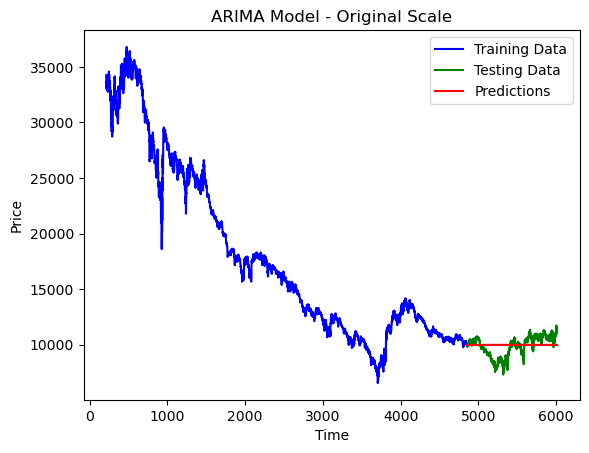

In [26]:
# Assuming you have already trained your ARIMA model and made predictions
# Model was trained on differenced data
predictions_diff = fitted_model.predict()

# Inverse transformation for training data
train_original = df['Price'].head(len(train_data) + 1)  # +1 is done in order to include the initial value
train_original_diff = train_original.diff().fillna(0)

# Inverse transformation for testing data
test_original = df['Price'].tail(len(test_data))
test_original_diff = test_original.diff().fillna(0)

# Inverse transformation for predicted values
predictions_original_diff = pd.Series(predictions_diff, index=test_data.index)
predictions_original_diff = predictions_original_diff.fillna(0)
predictions_original = predictions_original_diff.cumsum() + train_original.iloc[-1]

# Plotting
plt.plot(train_original, label='Training Data', color='blue')
plt.plot(test_original, label='Testing Data', color='green')
plt.plot(predictions_original, label='Predictions', color='red')

plt.title('ARIMA Model - Original Scale')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(test_original, predictions_original)
print(f'Mean Squared Error (MSE): {mse_arima}')

# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(test_original, predictions_original)
print(f'Mean Absolute Error (MAE): {mae_arima}')

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print(f'Root Mean Squared Error (RMSE): {rmse_arima}')


Mean Squared Error (MSE): 871919.7390067183
Mean Absolute Error (MAE): 751.5269595176571
Root Mean Squared Error (RMSE): 933.7664263651367


## Time Series Forecasting using Facebook Prophet

The dataset is split into training and testing sets for the Facebook Prophet time series forecasting model.
The Prophet model is trained on historical data and used to forecast future prices.
Mean Squared Error (MSE) is calculated for evaluation.
The forecast is visualized using the Prophet plotting functions.

11:07:13 - cmdstanpy - INFO - Chain [1] start processing
11:07:15 - cmdstanpy - INFO - Chain [1] done processing


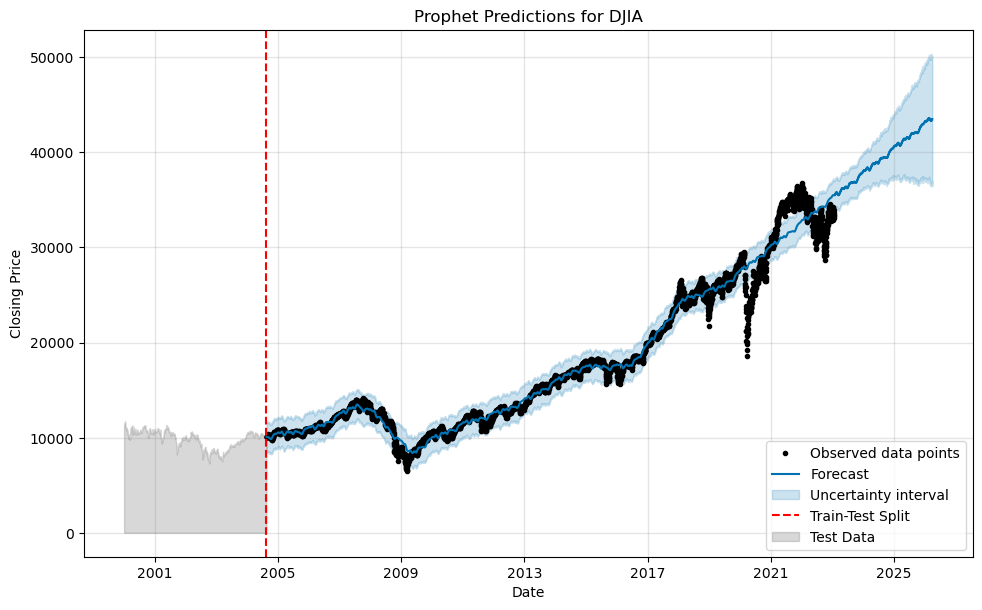

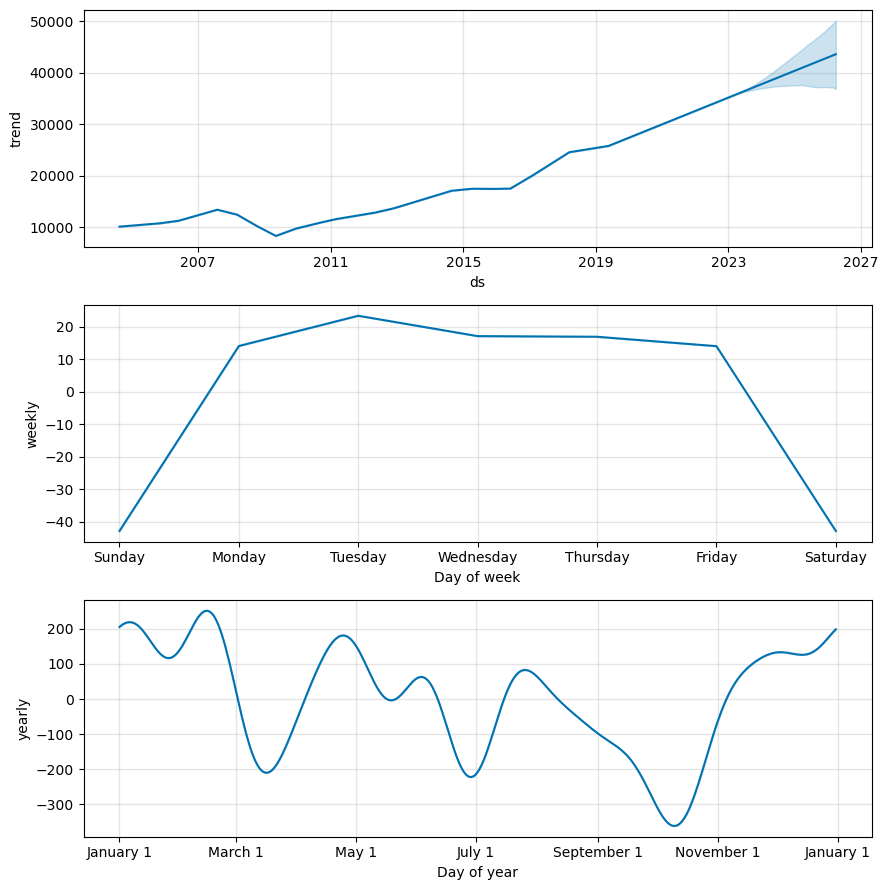

In [28]:
from prophet import Prophet

# Prepare the DataFrame with the required column names ('ds' for date, 'y' for target variable)
prophet_df = df[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

# Train-test split
train_size = int(len(prophet_df) * 0.8)
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

# Fit Prophet model with seasonality
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Make future dataframe for predictions
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='D')

# Forecast with Prophet
prophet_forecast = prophet_model.predict(future)


# Visualize Prophet predictions
fig = prophet_model.plot(prophet_forecast)

# Include labels for forecasted side
plt.title('Prophet Predictions for DJIA')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Highlight the forecasted side
plt.axvline(x=test_prophet['ds'].iloc[0], color='red', linestyle='--', label='Train-Test Split')
plt.fill_between(test_prophet['ds'].values, test_prophet['y'].values, color='gray', alpha=0.3, label='Test Data')
plt.legend()

# Plot the components (trend, weekly, and yearly seasonality)
fig_components = prophet_model.plot_components(prophet_forecast)
plt.show()


In [30]:
from prophet.diagnostics import cross_validation, performance_metrics

# Cross-validation
prophet_model_cv = cross_validation(model=prophet_model, period='20 days', horizon='20 days', parallel="processes")
prophet_model_cv.head()

# Model performance metrics
baseline_model_p = performance_metrics(prophet_model_cv, rolling_window=1)
baseline_model_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,20 days,2.472264e+06,1572.34355,1027.723184,0.051949,0.036923,0.051867,0.372746


### Hyperparameter tuning for the prophet Model

In [31]:
import itertools
from sklearn.model_selection import ParameterGrid
# Parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))

# Create a list to store MAPE values for each combination
mapes = []

# Use cross-validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params).fit(train_prophet)
    
    # Cross-validation
    df_cv = cross_validation(m, period='20 days', horizon='20 days', parallel="processes")
    
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    # Save Mean Absolute Percentage Error (MAPE) for each combination
    mapes.append(df_p['mape'].values[0])

# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes

# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print("Best Hyperparameters:", best_params)

11:13:50 - cmdstanpy - INFO - Chain [1] start processing
11:13:51 - cmdstanpy - INFO - Chain [1] done processing
11:15:59 - cmdstanpy - INFO - Chain [1] start processing
11:16:00 - cmdstanpy - INFO - Chain [1] done processing
11:18:16 - cmdstanpy - INFO - Chain [1] start processing
11:18:17 - cmdstanpy - INFO - Chain [1] done processing
11:20:24 - cmdstanpy - INFO - Chain [1] start processing
11:20:25 - cmdstanpy - INFO - Chain [1] done processing
11:22:33 - cmdstanpy - INFO - Chain [1] start processing
11:22:33 - cmdstanpy - INFO - Chain [1] done processing
11:24:42 - cmdstanpy - INFO - Chain [1] start processing
11:24:42 - cmdstanpy - INFO - Chain [1] done processing
11:27:08 - cmdstanpy - INFO - Chain [1] start processing
11:27:09 - cmdstanpy - INFO - Chain [1] done processing
11:29:35 - cmdstanpy - INFO - Chain [1] start processing
11:29:36 - cmdstanpy - INFO - Chain [1] done processing
11:31:57 - cmdstanpy - INFO - Chain [1] start processing
11:31:58 - cmdstanpy - INFO - Chain [1]

Best Hyperparameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}


14:46:46 - cmdstanpy - INFO - Chain [1] start processing
14:46:48 - cmdstanpy - INFO - Chain [1] done processing


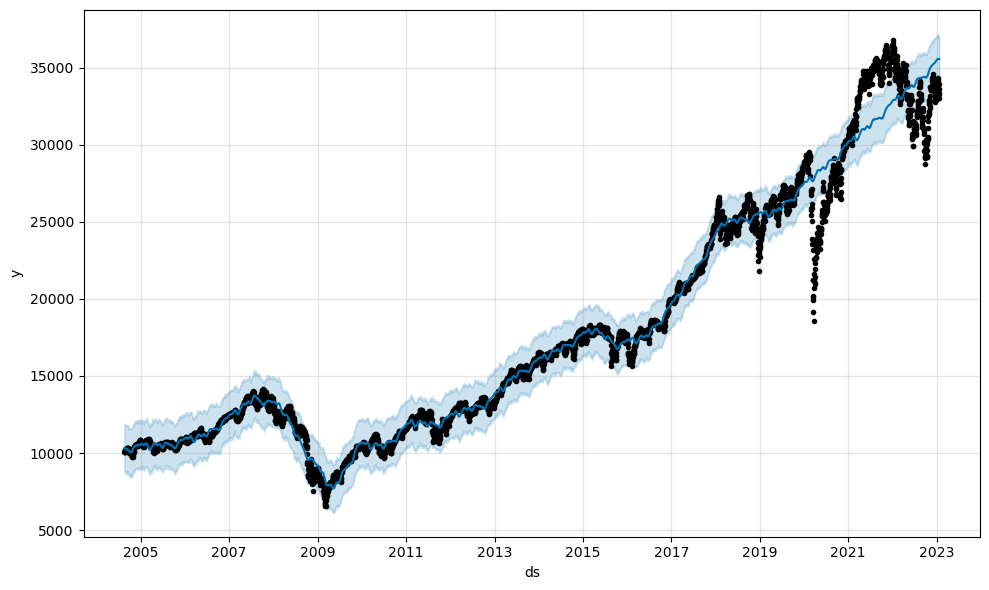

In [32]:
# Refit the model with the best parameters on the entire training dataset
final_model = Prophet(**best_params)
final_model.fit(train_prophet)

# Make predictions for future dates
forecast_steps = 0  
future_dates = final_model.make_future_dataframe(periods=forecast_steps)
forecast = final_model.predict(future_dates)

# Visualize the forecast
final_model.plot(forecast)
plt.show()
# Display the plot
plt.show()

In [81]:
# Get performance metrics for the predictions
df_cv = cross_validation(final_model, period='20 days', horizon='20 days', parallel="processes")
df_p = performance_metrics(df_cv, rolling_window=1)

# Display the performance metrics
print("Performance Metrics:")
print(df_p.head())

Performance Metrics:
  horizon           mse        rmse        mae      mape     mdape     smape  \
0 20 days  2.399885e+06  1549.15609  983.91194  0.047524  0.034412  0.047269   

   coverage  
0  0.362246  


In [84]:
# Extract MSE and RMSE from the performance metrics DataFrame
mse_prophet = df_p['mse'].values[0]
rmse_prophet = df_p['rmse'].values[0]
mae_prophet = df_p['mae'].values[0]

# Print the results
print("Prophet Model Performance Metrics:")
print(f'Mean Squared Error (MSE): {mse_prophet}')
print(f'Root Mean Squared Error (RMSE): {rmse_prophet}')
print(f'Mean Absolute Error (MAE): {mae_prophet}')

Prophet Model Performance Metrics:
Mean Squared Error (MSE): 2399884.591919221
Root Mean Squared Error (RMSE): 1549.156090237269
Mean Absolute Error (MAE): 983.9119398722434


## LSTM Time Series Prediction using Keras

The dataset is prepared and normalized for input to the LSTM (Long Short-Term Memory) neural network.
Sequences are created using a function (create_sequences).
The LSTM model is defined, compiled, and trained on the training data.
Predictions are made on the test set and then inverse transformed to the original scale.
Mean Squared Error (MSE) is calculated, and predictions are visualized alongside actual prices.

In [91]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense

In [92]:
# Ensure the data is sorted by date
df.sort_values(by='Date', inplace=True)

# Extract the 'Price' column as the target variable
data = df.reset_index()['Price']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(np.array(data).reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(data) * 0.65)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :1]

# Function to create a dataset with look back
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Reshape the data into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 200  
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

In [93]:
# LSTM layer
lstm_layer = LSTM(units=50, return_sequences=True)(input_layer)
lstm_layer = LSTM(units=50, return_sequences=True)(lstm_layer)
lstm_layer = LSTM(units=50)(lstm_layer)

# Dense layer
dense_layer = Dense(units=1)(lstm_layer)

# Create the model
model = Model(inputs=input_layer, outputs=dense_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
# Define hyperparameters
epochs = 20
batch_size = 16

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Epoch 1/20
224/224 [==============================] - 74s 273ms/step - loss: 6.5844e-04
Epoch 2/20
224/224 [==============================] - 62s 276ms/step - loss: 1.2074e-04
Epoch 3/20
224/224 [==============================] - 64s 285ms/step - loss: 9.7012e-05
Epoch 4/20
224/224 [==============================] - 63s 281ms/step - loss: 7.7183e-05
Epoch 5/20
224/224 [==============================] - 62s 278ms/step - loss: 7.0002e-05
Epoch 6/20
224/224 [==============================] - 62s 275ms/step - loss: 7.3746e-05
Epoch 7/20
224/224 [==============================] - 63s 281ms/step - loss: 6.0839e-05
Epoch 8/20
224/224 [==============================] - 62s 275ms/step - loss: 5.0913e-05
Epoch 9/20
224/224 [==============================] - 63s 279ms/step - loss: 4.5373e-05
Epoch 10/20
224/224 [==============================] - 63s 282ms/step - loss: 4.0476e-05
Epoch 11/20
224/224 [==============================] - 63s 280ms/step - loss: 4.5742e-05
Epoch 12/20
224/224 [=========

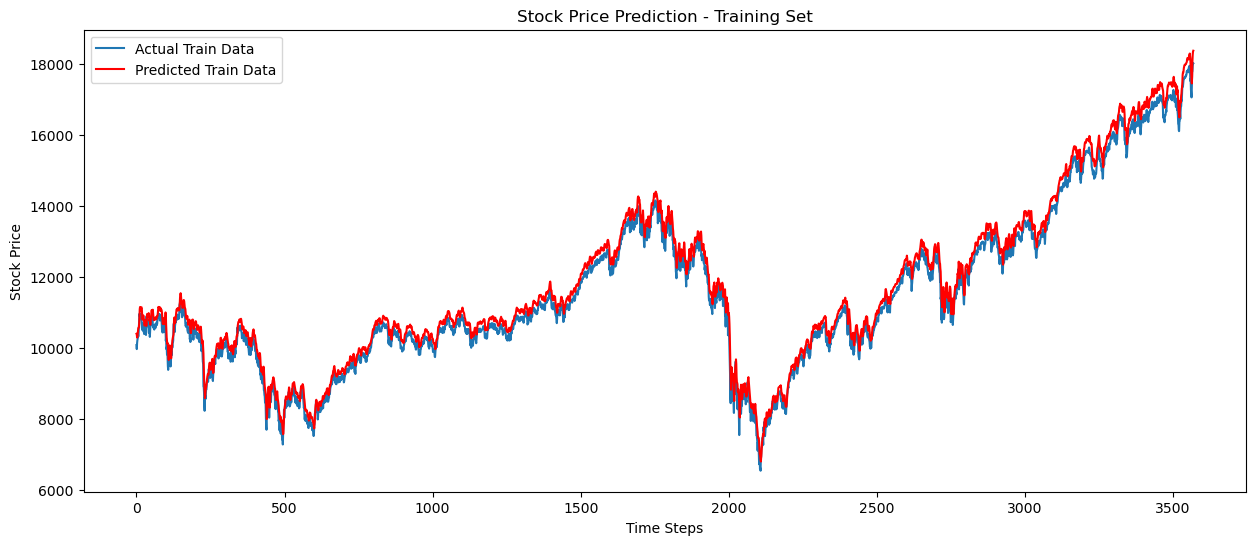

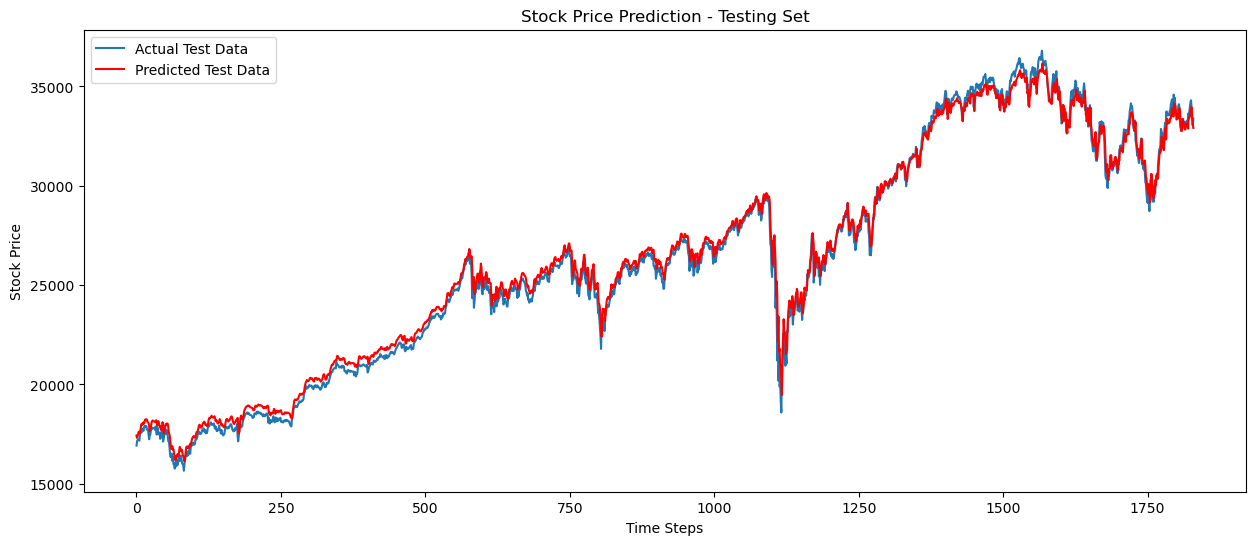

In [95]:
import matplotlib.pyplot as plt

# Plotting training set
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(y_train.reshape(-1, 1)), label='Actual Train Data')
plt.plot(train_predict, label='Predicted Train Data', color='red')
plt.title('Stock Price Prediction - Training Set')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plotting testing set
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Test Data')
plt.plot(test_predict, label='Predicted Test Data', color='red')
plt.title('Stock Price Prediction - Testing Set')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Forecasting for the future.

1/1 [==============================] - 0s 95ms/step


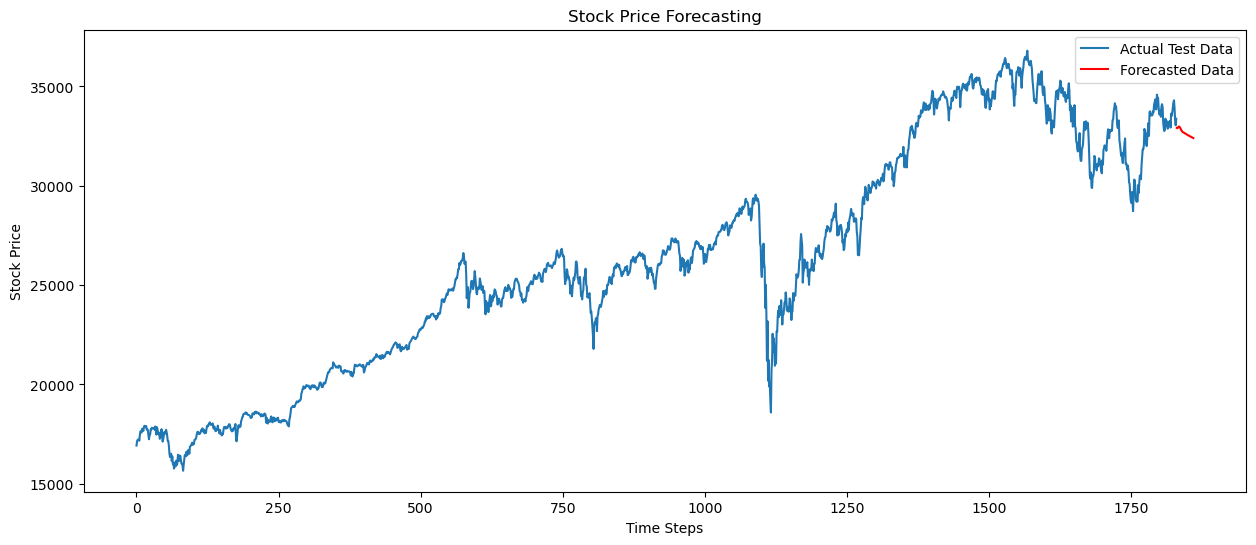

In [96]:
# Forecasting future stock prices
future_steps = 30  # The number of future steps to predict

# Take the last sequence from the test data to start forecasting
last_sequence = X_test[-1] 

forecast = []  # To store the forecasted values

for _ in range(future_steps):
    pred_value = model.predict(last_sequence.reshape(1, time_step, 1))  # Predict the next value
    forecast.append(pred_value[0, 0])  # Append the predicted value to the forecast list
    last_sequence = np.roll(last_sequence, -1)  # Shift the sequence one step forward
    last_sequence[-1] = pred_value  # Add the predicted value at the end

# Inverse transform the forecasted values
forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)

# Visualize the forecast
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Test Data')
plt.plot(len(y_test) + np.arange(len(forecast)), forecast, label='Forecasted Data', color='red')
plt.title('Stock Price Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Trim the actual values to match the length of the forecast
actual_values_trimmed = actual_values[-future_steps:]

# Calculate performance metrics
mse_lstm = mean_squared_error(actual_values_trimmed, forecast)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(actual_values_trimmed, forecast)

# Print the performance metrics
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (MSE): {rmse_lstm}')
print(f'Mean Absolute Error (MAE): {mae_lstm}')

Mean Squared Error (MSE): 801241.1541517231
Root Mean Squared Error (MSE): 895.1207483639976
Mean Absolute Error (MAE): 768.3978671874997


## Evaluation of  Performance of Models

     Model           MSE         MAE         RMSE
0    ARIMA  8.719197e+05  751.526960   933.766426
1  Prophet  2.399885e+06  983.911940  1549.156090
2     LSTM  8.012412e+05  768.397867   895.120748


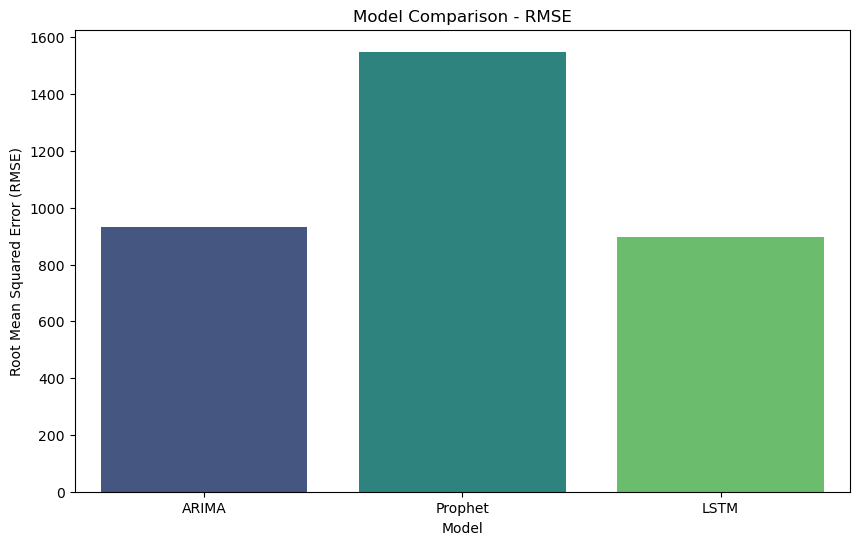

In [102]:
# Comparison of Model Performance

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store model metrics
model_comparison = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE'])

# ARIMA Model Metrics
model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['ARIMA'],
    'MSE': [mse_arima],
    'MAE': [mae_arima],
    'RMSE': [rmse_arima]
})], ignore_index=True)

# Prophet Model Metrics
model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['Prophet'],
    'MSE': [mse_prophet],
    'MAE': [mae_prophet],
    'RMSE': [rmse_prophet]
})], ignore_index=True)

# LSTM Model Metrics
model_comparison = pd.concat([model_comparison, pd.DataFrame({
    'Model': ['LSTM'],
    'MSE': [mse_lstm],
    'MAE': [mae_lstm],
    'RMSE': [rmse_lstm]
})], ignore_index=True)

# Display the model comparison table
print(model_comparison)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=model_comparison, palette='viridis')
plt.title('Model Comparison - RMSE')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()

The Prophet model has significantly higher errors (RMSE, MAE, MAPE) compared to the other models, suggesting that it may not be performing well on your data. The ARIMA and LSTM models seem to have lower errors compared to the prophet model

# Model Training Summary

## ARIMA Model

-  **Root Mean Squared Error (RMSE):** 933.766

## LSTM Model

- **Epochs:** 20
- **Root Mean Squared Error (RMSE):** 895.121

## Prophet Model

- **Root Mean Squared Error (RMSE):** 1549.156

In summary, the LSTM model, trained for 20 epochs, achieved the lowest RMSE of 895.121, indicating better performance compared to the ARIMA and Prophet models. The ARIMA model follows with an RMSE of 933.766, while the Prophet model shows a higher RMSE of 1549.156.





Considering the RMSE, lower values indicate better predictive performance. In this case, the LSTM Model appears to be the most suitable choice for predicting the short-term movement of the Dow Jones Industrial Average.

Other additional reasons for choosing the LSTM Model include:

- **Sequential Learning:** LSTMs are capable of learning sequential patterns, making them suitable for time series data.

- **Capturing Long-Term Dependencies:** LSTMs can capture long-term dependencies and complex patterns in data, which is essential for predicting stock prices.

- **Flexibility:** LSTMs are flexible and can be adapted to various time series forecasting tasks.

- **Proven Track Record in Time Series Forecasting:** LSTMs have shown success in predicting various patterns in time seies data.
 


In conclusion, the LSTM model stands out as the optimal choice for investors prioritizing precise short-term predictions, evident from its consistently low RMSE. While ARIMA remains valuable for capturing specific short-term trends, the robust performance of LSTM positions it as the preferred model. To enhance predictive capabilities, combining LSTM with complementary models such as ARIMA is recommended. This strategic diversification, integrating machine learning predictions with fundamental and technical analyses, equips investors with a comprehensive approach for effective portfolio management and informed decision-making.

### Recommendations

- **Leverage LSTM Model:** Investors should capitalize on the consistently accurate predictions of the LSTM Model, evident in its low Root Mean Squared Error (RMSE) for DJIA movements. The LSTM model excels in both short-term precision and capturing long-term dependencies, making it a robust choice for comprehensive market forecasting.

- **Diversify Investment Portfolio:** To mitigate risks associated with model reliance, investors are advised to diversify their investment portfolio based on forecasts from various models. Integrating these predictions into a comprehensive approach, combining machine learning insights with fundamental and technical analyses, provides a nuanced understanding of potential market trends.

- **Maintain Proactive Stance:** Investors are encouraged to maintain a proactive stance in the dynamic financial landscape. Continuous monitoring and adaptable strategies in response to real-time market conditions empower investors to navigate uncertainties effectively. Recognizing the unpredictable nature of financial markets, diversification of predictive models, and constant monitoring against real-time market data are vital risk mitigation strategies.

- **Flexibility in Decision-Making:** Investors are advised to approach decision-making with flexibility, considering unforeseen events that can significantly impact market behavior. In conclusion, a holistic understanding, coupled with an adaptive and diversified forecasting approach centered around the LSTM model, provides a resilient and well-informed foundation for navigating the ever-evolving landscape of financial arkets.
al markets.


# Deployment

In [105]:
import pickle
import streamlit as st
import joblib
import numpy as np

In [106]:
# # give the model a distinctive name
# arima_model = fitted_model
# Load the LSTM model
model = joblib.load('lstm_model.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'lstm_model.joblib'

In [ ]:
# Serialize the model to a file
with open('arima_model.pkl', 'wb') as model_file:
    pickle.dump(arima_model,model_file)

In [ ]:
# Load the model from the file
with open('arima_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
# Use the loaded model for predictions (example)
predictions = loaded_model.forecast(steps=10) 
predictions